In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt

# The Parameters for Q-learning
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.2  # Exploration rate
num_episodes = 1000  # Total number of training episodes

grid_size = 5  # Size of the grid world
goal_position = (4, 4)  #  The goal position at (5, 5) in zero-indexed form
obstacles = [(1, 1), (3, 3)]  # Obstacles at (2, 2) and (4, 4) in zero-indexed form

# Define possible actions and their corresponding movements
actions = ['up', 'down', 'left', 'right']
action_map = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}

# Initializing all the Q-table with zeros for all state-action pairs
Q_table = np.zeros((grid_size, grid_size, len(actions)))

# This function returns  the reward for a given position
def get_reward(position):
    if position == goal_position:
        return 100  # High reward for reaching the goal
    elif position in obstacles:
        return -10  # Penalty for hitting an obstacle
    else:
        return 1  # Small positive reward for valid moves

# This function checks if a position is within the grid boundaries
def is_valid_position(position):
    x, y = position
    return 0 <= x < grid_size and 0 <= y < grid_size

# Q-learning algorithm: This trains the agent over multiple episodes
for episode in range(num_episodes):
    state = (0, 0)  # Start position at the beginning of each episode
    total_reward = 0
    while state != goal_position:
        # Choose an action using epsilon-greedy strategy
        if random.uniform(0, 1) < epsilon:
            action_index = random.choice(range(len(actions)))  # Explores: a random action
        else:
            action_index = np.argmax(Q_table[state])  # Exploits: the best known action
        
        action = actions[action_index]
        new_state = (state[0] + action_map[action][0], state[1] + action_map[action][1])
        
        # Check if the new state is valid; if not, stay in the same state
        if not is_valid_position(new_state):
            new_state = state
        
        # Get the reward for the new state
        reward = get_reward(new_state)
        total_reward += reward
        
        # Update the Q-value using the Q-learning update rule
        best_future_q = np.max(Q_table[new_state])
        Q_table[state + (action_index,)] += alpha * (reward + gamma * best_future_q - Q_table[state + (action_index,)])
        
        # Move to the new state
        state = new_state

Learned Policy:
[['right' 'right' 'right' 'down' 'left']
 ['up' 'X' 'up' 'down' 'up']
 ['up' 'left' 'right' 'down' 'left']
 ['up' 'up' 'right' 'X' 'up']
 ['up' 'up' 'up' 'right' 'G']]


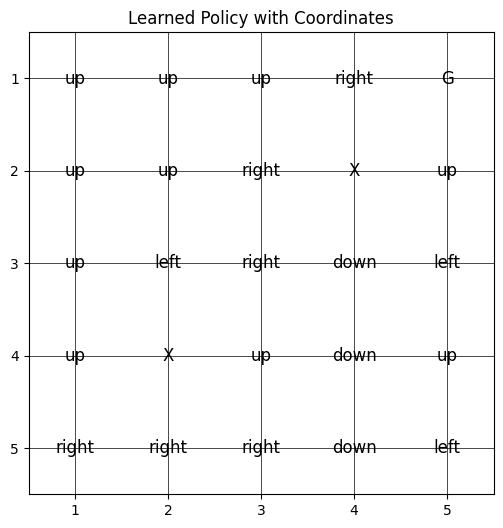

In [14]:
# Visualizing the learned policy
policy = np.full((grid_size, grid_size), '', dtype=object)
for i in range(grid_size):
    for j in range(grid_size):
        best_action_index = np.argmax(Q_table[i, j])
        policy[i, j] = actions[best_action_index]

# Mark the goal and obstacles in the policy grid
policy[goal_position] = 'G'
for obs in obstacles:
    policy[obs] = 'X'

# Display the learned policy in the console
print("Learned Policy:")
print(policy)

# Plot the policy with x and y coordinates
plt.figure(figsize=(6, 6))
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, grid_size - i - 1, policy[i, j], ha='center', va='center', fontsize=12)

plt.xticks(np.arange(0, grid_size, 1), [f'{i+1}' for i in range(grid_size)])
plt.yticks(np.arange(0, grid_size, 1), [f'{i+1}' for i in range(grid_size)])
plt.grid(True, which='both', color='black', linewidth=0.5)
plt.xlim(-0.5, grid_size - 0.5)
plt.ylim(-0.5, grid_size - 0.5)
plt.title("Learned Policy with Coordinates")
plt.gca().invert_yaxis()
plt.show()